In [66]:
import time

#Importando as bibliotecas
import cv2, time
import numpy as np
import seaborn as sns

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'
%matplotlib inline

## RGB Color Space

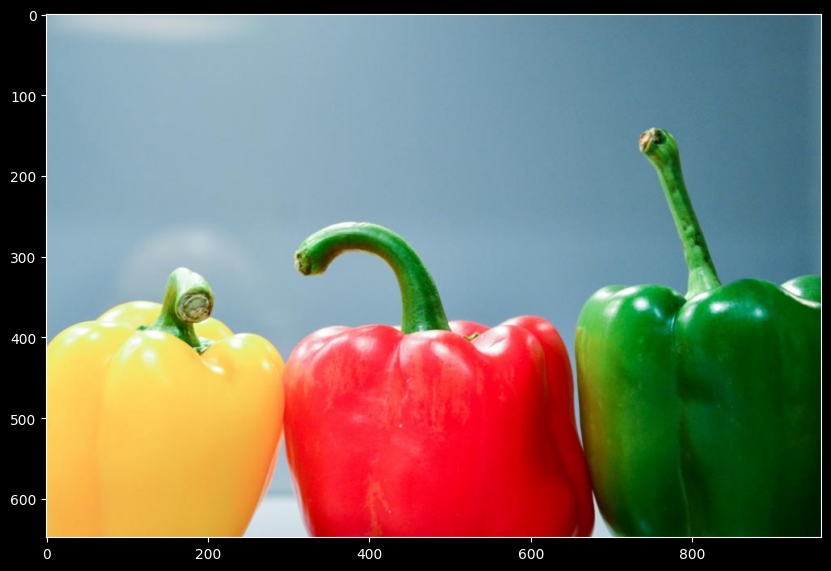

In [9]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"

imagePath = f"{DATA_PATH}\\images\\capsicum.jpg"
src = cv2.imread(imagePath)
plt.imshow(src[:,:,::-1]);

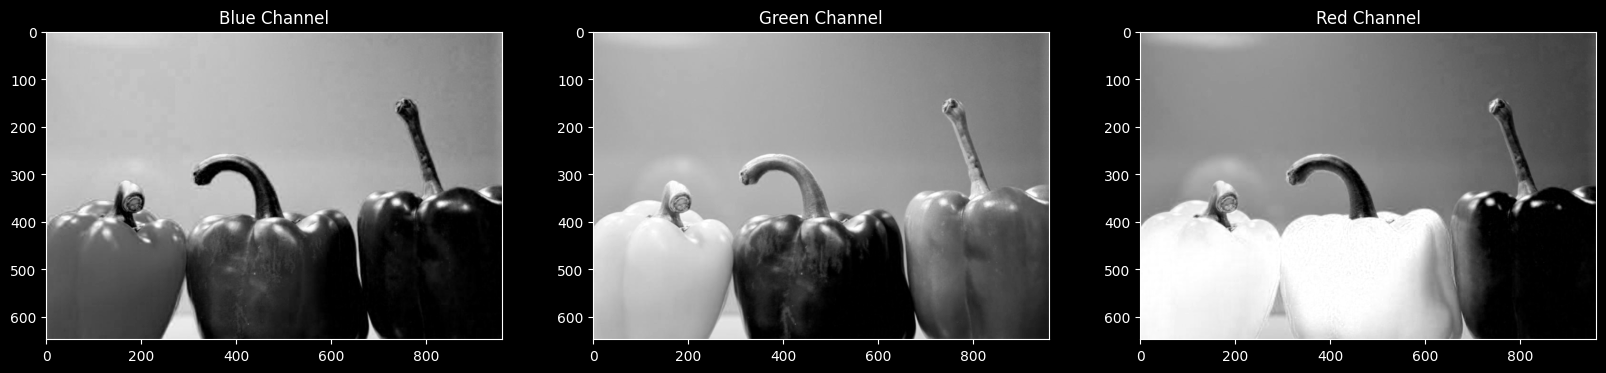

In [17]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(src[:,:,0], cmap = "gray")
plt.title("Blue Channel");
plt.subplot(132)
plt.imshow(src[:,:,1], cmap = "gray")
plt.title("Green Channel");
plt.subplot(133)
plt.imshow(src[:,:,2], cmap = "gray");
plt.title("Red Channel");

## HSV Color Space

### Value Test

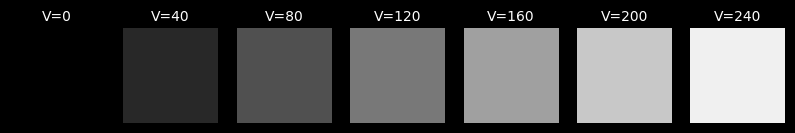

In [33]:
plt.figure(figsize=(10,10))

for idx in range(0, 7):

    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)

    value = idx * 40
    imhsv[:,:,:] = (0, 0, value)

    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)

    ax = plt.subplot(1, 7, idx+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('V='+ str(value), fontdict={'fontsize': 10, 'fontweight': 'medium'});

### Saturation Test

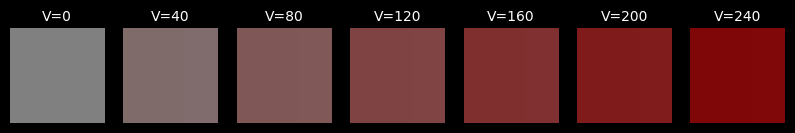

In [35]:
plt.figure(figsize=(10,10))

for idx in range(0, 7):

    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)

    saturation = idx * 40
    imhsv[:,:,:] = (0, saturation, 128)

    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)

    ax = plt.subplot(1, 7, idx+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('V='+ str(saturation), fontdict={'fontsize': 10, 'fontweight': 'medium'});

### Hue Test

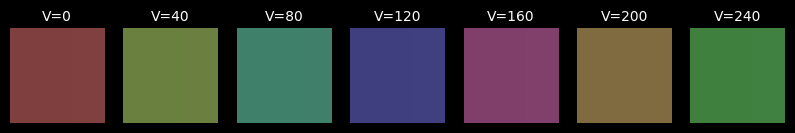

In [37]:
plt.figure(figsize=(10,10))

for idx in range(0, 7):

    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)

    hue = idx * 40
    imhsv[:,:,:] = (hue, 128, 128)

    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)

    ax = plt.subplot(1, 7, idx+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('V='+ str(hue), fontdict={'fontsize': 10, 'fontweight': 'medium'});

## Other Color Spaces

### YCrCb color space

In [38]:
ycbImage = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

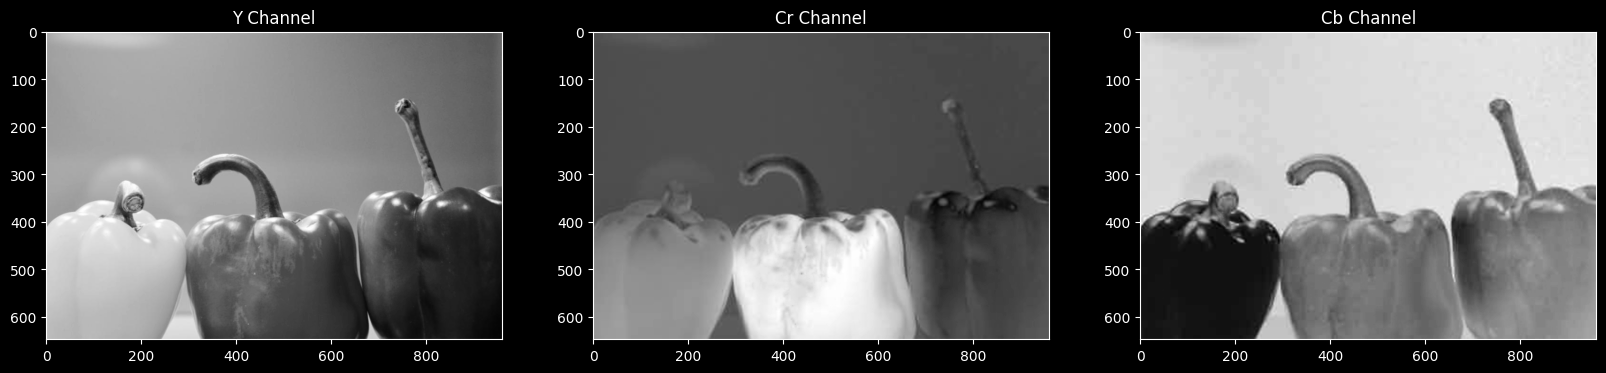

In [40]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(ycbImage[:,:,0], cmap = "gray")
plt.title("Y Channel");
plt.subplot(132)
plt.imshow(ycbImage[:,:,1], cmap = "gray")
plt.title("Cr Channel");
plt.subplot(133)
plt.imshow(ycbImage[:,:,2], cmap = "gray");
plt.title("Cb Channel");

### Lab color space

In [41]:
labImage = cv2.cvtColor(src, cv2.COLOR_BGR2Lab)

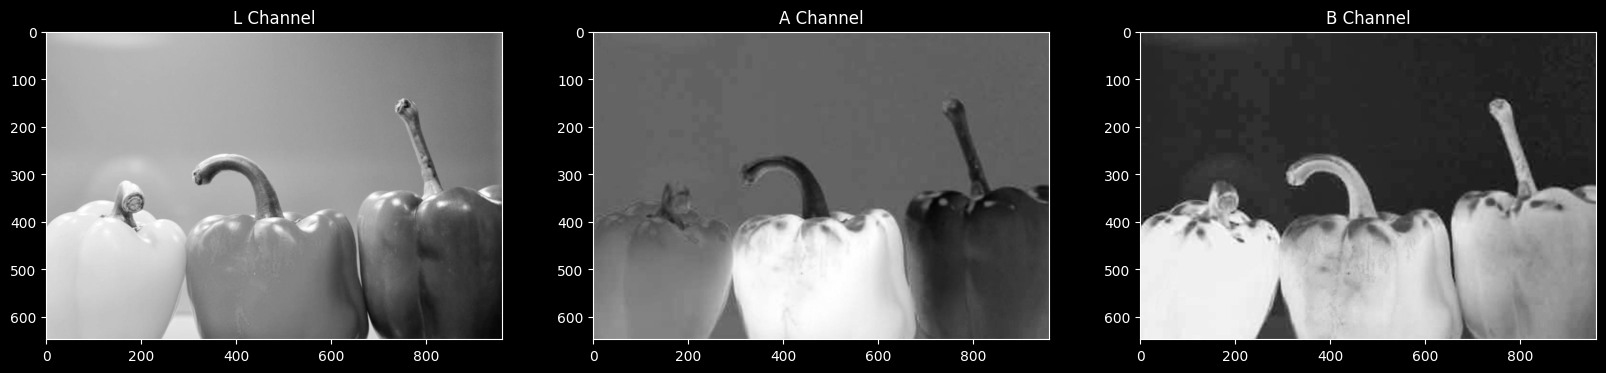

In [45]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(labImage[:,:,0], cmap = "gray")
plt.title("L Channel");
plt.subplot(132)
plt.imshow(labImage[:,:,1], cmap = "gray")
plt.title("A Channel");
plt.subplot(133)
plt.imshow(labImage[:,:,2], cmap = "gray");
plt.title("B Channel");

## Image Histogram

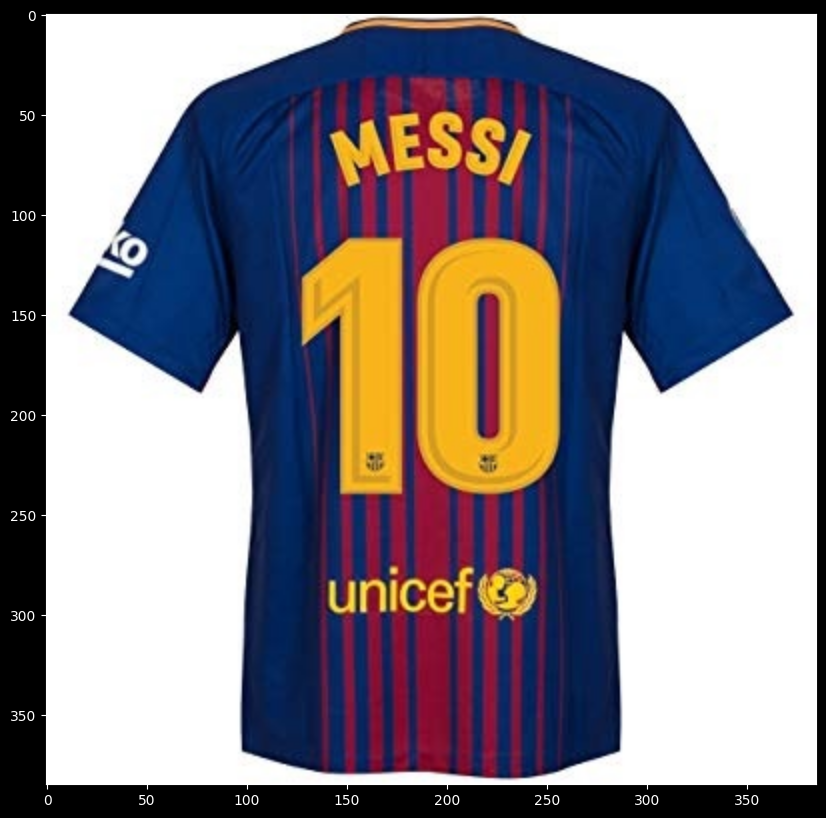

In [46]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"

imagePath = f"{DATA_PATH}\\images\\jersey.jpg"
src = cv2.imread(imagePath)
plt.imshow(src[:,:,::-1]);

In [48]:
hsvimage = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsvimage)

In [50]:
H_array = H[S > 10].flatten()

In [51]:
print(H_array)
print(H_array.shape)

[26 23 30 ... 92 45 39]
(85188,)


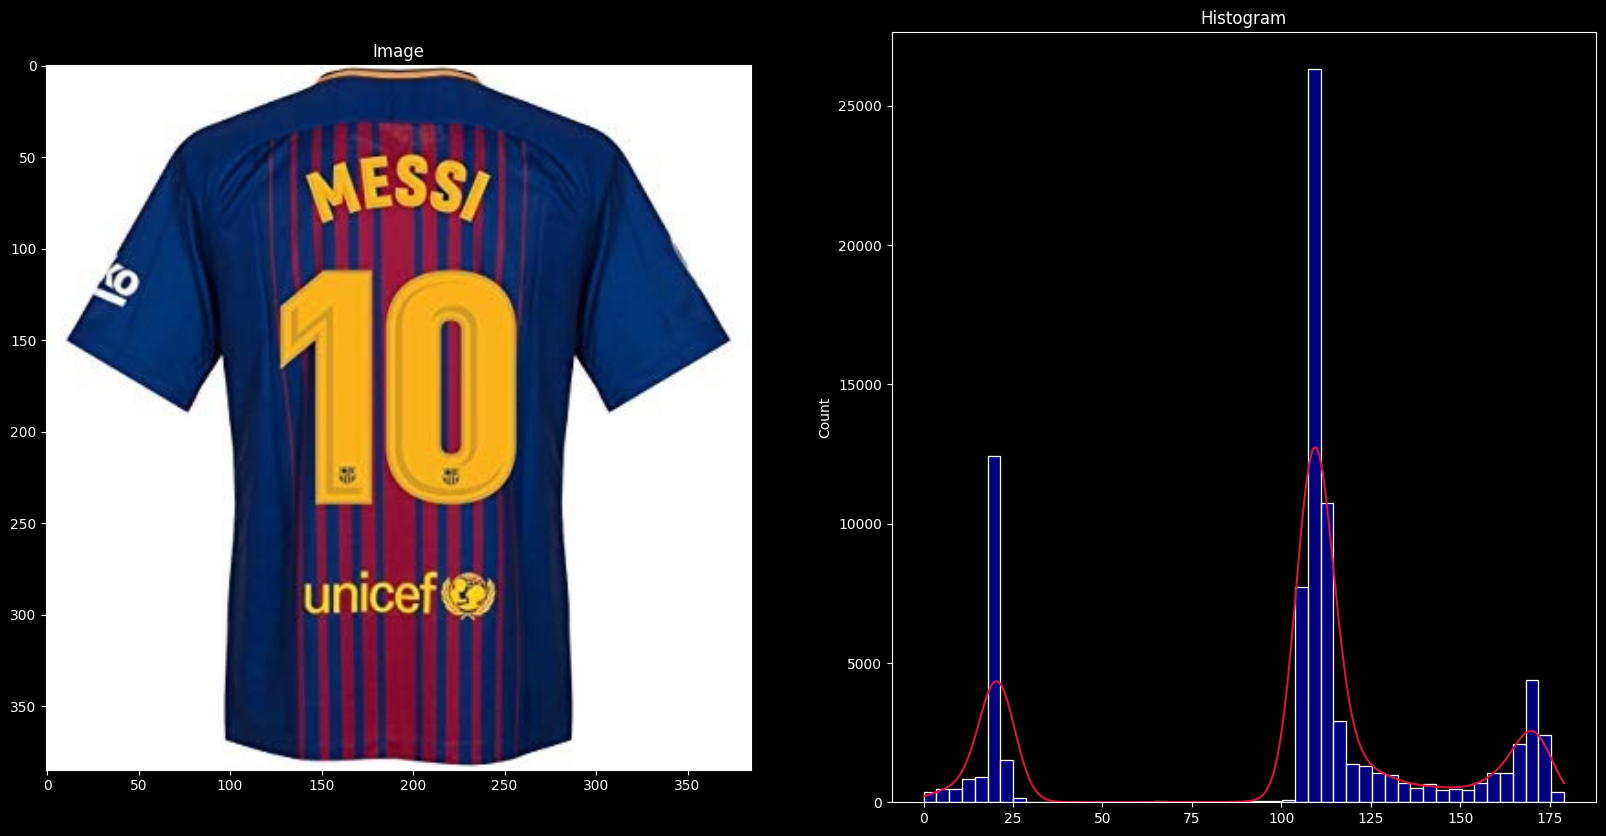

In [78]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(src[:,:,::-1])
plt.title("Image")
plt.subplot(122)
ax = sns.histplot(H_array, bins=50, kde=True, color="blue")
ax.lines[0].set_color('crimson')
plt.title("Histogram")
plt.show();

## Desaturation Filter

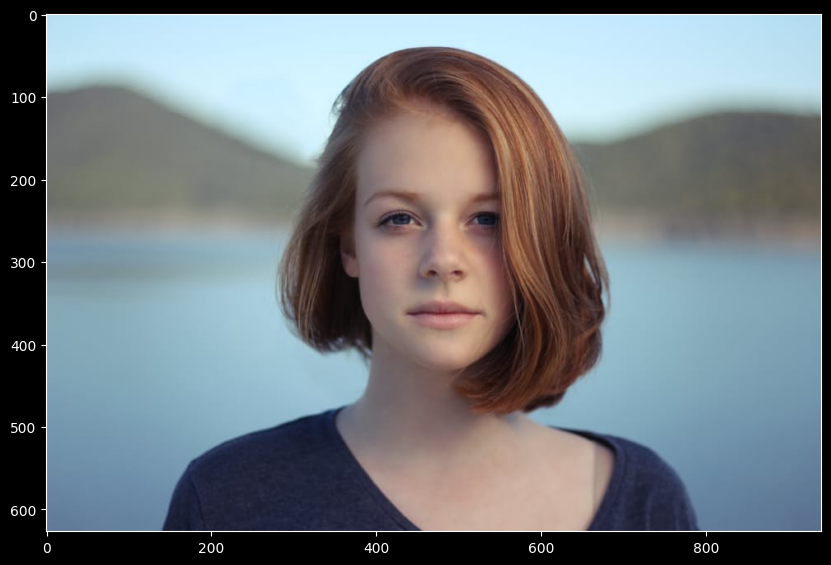

In [79]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"

imagePath = f"{DATA_PATH}\\images\\girl.jpg"
src = cv2.imread(imagePath)
plt.imshow(src[:,:,::-1]);

In [80]:
saturationScale = 0.01
hsvimage = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsvimage = np.float32(hsvimage)

H, S, V  = cv2.split(hsvimage)

In [82]:
S = np.clip(S * saturationScale, 0, 255)
hsvimage = np.uint8(cv2.merge([H,S,V]))
imSat = cv2.cvtColor(hsvimage, cv2.COLOR_HSV2BGR)

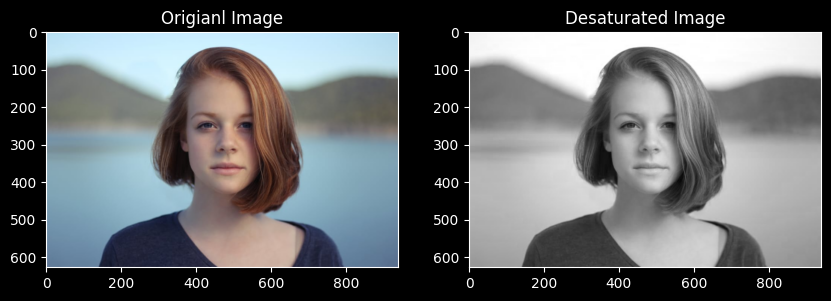

In [87]:
plt.subplot(121)
plt.imshow(src[:,:,::-1])
plt.title("Origianl Image")
plt.subplot(122)
plt.title("Desaturated Image")
plt.imshow(imSat[:,:,::-1])
plt.show()

https://en.wikipedia.org/wiki/Color_space
https://en.wikipedia.org/wiki/Color_model
https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/
https://realpython.com/python-opencv-color-spaces/
https://docs.opencv.org/4.1.0/df/d9d/tutorial_py_colorspaces.html
https://www.cambridgeincolour.com/tutorials/color-spaces.htm
https://pysource.com/2018/01/31/object-detection-using-hsv-color-space-opencv-3-4-with-python-3-tutorial-9/
https://www.tutorialspoint.com/dip/introduction_to_color_spaces.htm
https://www.youtube.com/watch?v=LFXN9PiOGtY
https://youtu.be/CF4wuPLBaAA